In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [2]:
file = 'aggregated_results.csv'

folder = '../results/EMSE/'

df = pd.read_csv(os.path.join(folder, file))
df['clazz'] = df['class']

In [3]:
allimpl = df.impl.unique() 

hashimpl = list(filter(lambda x: '_HASH' in x or 'QHASH' in x, allimpl))

arrayimpl = list(filter(lambda x: '_ARRAY' in x, allimpl))
linkedimpl = list(filter(lambda x: '_LINKED' in x, allimpl))
sortedimpl = list(filter(lambda x: 'RB' in x or 'TREE' in x or 'AVL' in x, allimpl))

map_primitives = list(filter(lambda x: 'O2I' in x, allimpl))

apis = ['JDK8Compute','JDK8Merge','JDKGetPut']

### Renaming Implementations

### Renaming classes

In [4]:
to_replace = {'EclipseIntegerAddTo':'API AddTo',
              'EclipseUpdateValue': 'API I',
              
              'KolobokeIntegerAddTo': 'API AddTo',
              
              'MahoutIntegerAddTo': 'API AddTo',
              'MahoutIntegerGetPut': 'API I', 
              
              'FastutilIntegerAddToH':'API AddTo',
              'FastutilIntegerGetPut': 'API I',
              'FastutilIntegerAddToA': 'API AddTo',
              'FastutilIntegerAddToR': 'API AddTo',
             
              'GuavaMultiSetAdd': 'API I',
             
              'HPPCGetPut': 'API I',
              'HPPCIndexOf': 'API II',
              'HPPCIntegerAddTo': 'API AddTo',
              
              'ScalaGetPut': 'API I',
              'ScalaGetOrElsePut': 'API II',
              
              'TroveIntegerAdjust': 'API I'
              }

In [5]:
hash_wordcount = df.query('workload == "WORDCOUNT" and impl in @hashimpl and size == 1000000 and clazz == @apis')

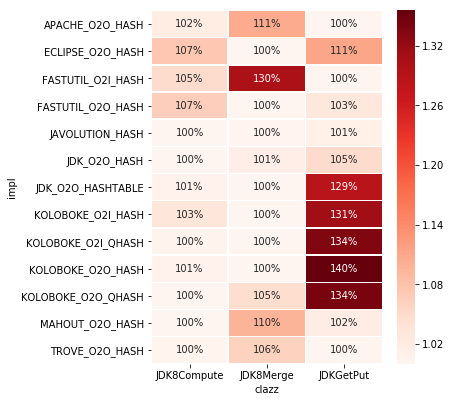

In [6]:
%matplotlib inline
table = pd.pivot_table(data=hash_wordcount, index='impl', columns='clazz', values='mean')

fastest = table.min(axis=1)
table = table.divide(fastest, axis=0)
S = .5
plt.figure(figsize=(.4 * len(table), S * len(table)))  # Should be a parameter

clrs = sns.color_palette("Reds", 256)
sns.heatmap(data=table, cmap=clrs, linewidths=.5, robust=True, fmt="2.0%", annot=True)

plt.savefig(os.path.join(folder, 'wordcount-hash-jdkapi-size1M.pdf'))


NameError: name 'wordcount' is not defined

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


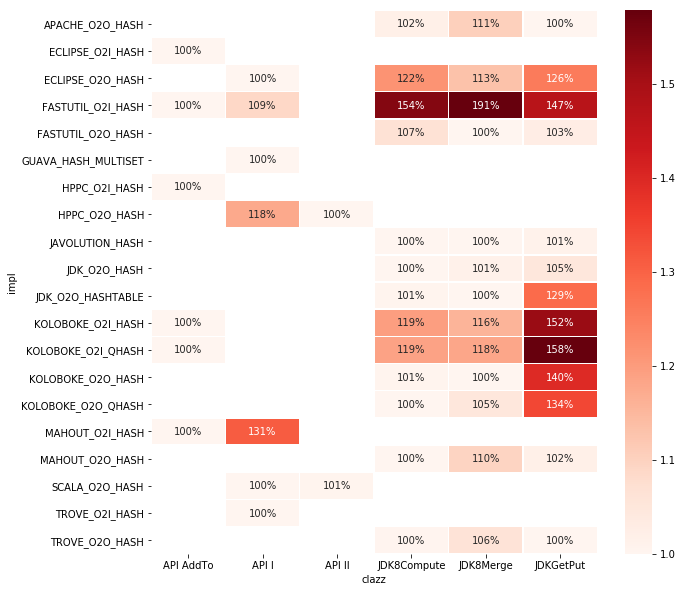

In [8]:
wordcount = df.query('workload == "WORDCOUNT" and impl in @hashimpl and size == 1000000')

wordcount['clazz'] = wordcount['class'].replace(to_replace=to_replace)

%matplotlib inline
table = pd.pivot_table(data=wordcount, index='impl', columns='clazz', values='mean')

fastest = table.min(axis=1)
table = table.divide(fastest, axis=0)
S = .5
plt.figure(figsize=(.5 * len(table), S * len(table)))  # Should be a parameter

clrs = sns.color_palette("Reds", 256)
sns.heatmap(data=table, cmap=clrs, linewidths=.5, robust=True, fmt="2.0%", annot=True)

plt.savefig(os.path.join(folder, 'wordcount-hash-allapi-size1M.pdf'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


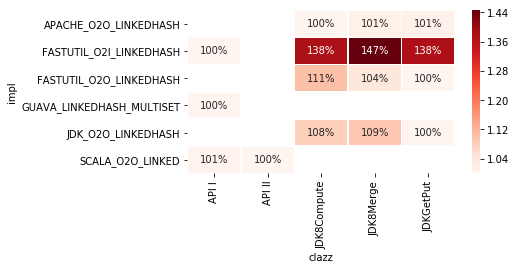

In [9]:
wordcount = df.query('workload == "WORDCOUNT" and impl in @linkedimpl and size == 1000000')

wordcount['clazz'] = wordcount['class'].replace(to_replace=to_replace)

%matplotlib inline
table = pd.pivot_table(data=wordcount, index='impl', columns='clazz', values='mean')

fastest = table.min(axis=1)
table = table.divide(fastest, axis=0)
S = .5
plt.figure(figsize=(1 * len(table), S * len(table)))  # Should be a parameter

clrs = sns.color_palette("Reds", 256)
sns.heatmap(data=table, cmap=clrs, linewidths=.5, robust=True, fmt="2.0%", annot=True)

plt.savefig(os.path.join(folder, 'wordcount-linked-allapi-size1M.pdf'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


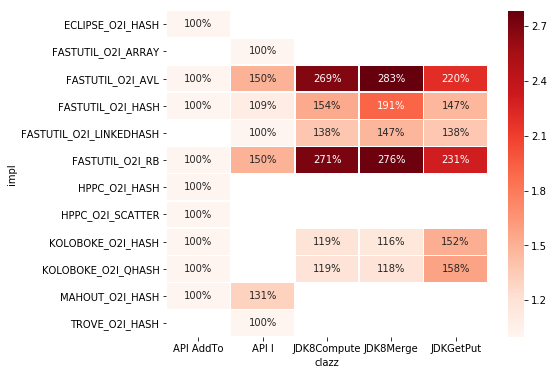

In [10]:
wordcount = df.query('workload == "WORDCOUNT" and impl in @map_primitives and size == 1000000')

wordcount['clazz'] = wordcount['class'].replace(to_replace=to_replace)

%matplotlib inline
table = pd.pivot_table(data=wordcount, index='impl', columns='clazz', values='mean')

fastest = table.min(axis=1)
table = table.divide(fastest, axis=0)
S = .5
plt.figure(figsize=(.6 * len(table), S * len(table)))  # Should be a parameter

clrs = sns.color_palette("Reds", 256)
sns.heatmap(data=table, cmap=clrs, linewidths=.5, robust=True, fmt="2.0%", annot=True)

plt.savefig(os.path.join(folder, 'wordcount-prim-allapi-size1M.pdf'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


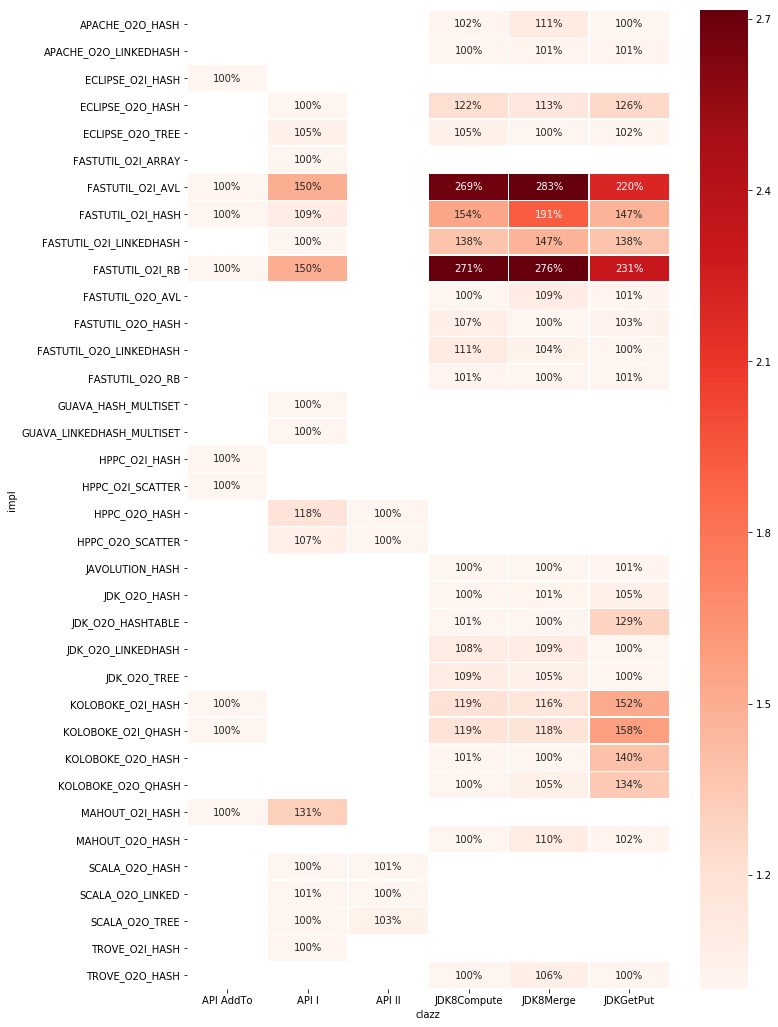

In [11]:
wordcount = df.query('workload == "WORDCOUNT" and size == 1000000 and clazz not in ["Noop", "Blackhole"]')

wordcount['clazz'] = wordcount['class'].replace(to_replace=to_replace)

%matplotlib inline
table = pd.pivot_table(data=wordcount, index='impl', columns='clazz', values='mean')

fastest = table.min(axis=1)
table = table.divide(fastest, axis=0)
S = .5
plt.figure(figsize=(.3 * len(table), S * len(table)))  # Should be a parameter

clrs = sns.color_palette("Reds", 256)
sns.heatmap(data=table, cmap=clrs, linewidths=.5, robust=True, fmt="2.0%", annot=True)

plt.savefig(os.path.join(folder, 'wordcount-all-allapi-size1M.pdf'))